# HW-4

## Dataset-1 Statlog (German Credit Data) Data Set


### This dataset classifies people described by a set of attributes as good or bad credit risks. Two datasets are provided. The original dataset is used in this homework in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data". In this part of homework, it is aimed to predict the status of existing checking account, which is a multi-class classification problem. Additionally, this has a class imbalance problem.

### Features of Dataset 
Data Set Characteristics:Multivariate
Number of Instances:1000
Area:Financial
Attribute Characteristics:Categorical, Integer
Number of Attributes:20
Associated Tasks:Classification
Missing Values:N/A

### Attributes of Dataset
Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

In [2]:
#used libraries
library(data.table)
library(Matrix)
library(tidyverse)
library(dplyr)
library(glmnet)
library(caret)
library(data.table)
require(lubridate)
library(forecast)
library(e1071)
library(rpart)
require(data.table)
require(lubridate)
require(caret)
library(gbm)
library(rpart.plot)

In [3]:
#Reading dataset
data_set3 = read.table("C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/german.data")
data_set3 = as.data.frame(data_set3)
size_set3 = nrow(data_set3)
column_set3 =ncol(data_set3)
#training size determined as 0.75*dataset size
train_size3 = size_set3*0.75

#Saving as factors of nonnumeric variables and class
for (i in 1:column_set3){
    if (i != 2 & i != 5 & i !=8 & i !=11 & i !=13 & i !=16 &  i!=18 &  i!=21){
        data_set3[,i] = as.factor(data_set3[,i])
    }
}
#generating training set and testing set
train_set3 = matrix(0,train_size3,column_set3)
test_set3 = matrix(0,(size_set3-train_size3+1),column_set3)
train_set3 = data_set3[1:train_size3,]
test_set3 = data_set3[(train_size3):size_set3,]
class_3_test = test_set3[,1]
class_3_train = train_set3[,1]
att_test3 = test_set3[,2:column_set3]
att_train3 = train_set3[,2:column_set3]

In [4]:
class_3_test = test_set3[,1]
class_3_train = train_set3[,1]
att_test3 = test_set3[,2:column_set3]
att_train3 = train_set3[,2:column_set3]
train_set3=data.frame(train_set3)
colnames(train_set3) <- c("class",paste0("att_", 1:20))
colnames(test_set3) <- c("class",paste0("att_", 1:20))

In [5]:
#Model 1 - Lasso Regression
set.seed(1)
#lambda is determined between 0.0005 and 0.000001 with 6 values
lambda_seq = c(seq(0.000001,0.0005,length=6))
n_repeats=5
n_folds=10
lasso_grid = expand.grid(alpha=1,lambda=lambda_seq)
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)                         
lassolr_fit = train(class~ .,data=train_set3,
                 method = "glmnet", 
                 tuneGrid = lasso_grid,
                 trControl = Control) 

In [6]:
summary(lassolr_fit)
lassolr_fit

            Length Class      Mode     
a0          340    -none-     numeric  
beta          4    -none-     list     
dfmat       340    -none-     numeric  
df           85    -none-     numeric  
dim           2    -none-     numeric  
lambda       85    -none-     numeric  
dev.ratio    85    -none-     numeric  
nulldev       1    -none-     numeric  
npasses       1    -none-     numeric  
jerr          1    -none-     numeric  
offset        1    -none-     logical  
classnames    4    -none-     character
grouped       1    -none-     logical  
call          5    -none-     call     
nobs          1    -none-     numeric  
lambdaOpt     1    -none-     numeric  
xNames       46    -none-     character
problemType   1    -none-     character
tuneValue     2    data.frame list     
obsLevels     4    -none-     character
param         0    -none-     list     

glmnet 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 677, 675, 675, 675, 674, 674, ... 
Resampling results across tuning parameters:

  lambda     Accuracy   Kappa    
  0.0000010  0.4821929  0.2303634
  0.0001008  0.4821894  0.2302060
  0.0002006  0.4819372  0.2291584
  0.0003004  0.4808740  0.2271886
  0.0004002  0.4811372  0.2271513
  0.0005000  0.4805968  0.2261679

Tuning parameter 'alpha' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 1e-06.

In [39]:
#accuracy of lasso model at alpha = 1 and lambda = 1e-06
model_lasso_accuracy = 0.4821929

In [31]:
#Prediction with lasso
predict_lasso = predict(lassolr_fit, test_set3 )
cm = confusionMatrix(predict_lasso, test_set3$class)
cm

Confusion Matrix and Statistics

          Reference
Prediction A11 A12 A13 A14
       A11  41   9   2  16
       A12  13  21   4  16
       A13   3   2   1   1
       A14  21  23   5  73

Overall Statistics
                                         
               Accuracy : 0.5418         
                 95% CI : (0.478, 0.6046)
    No Information Rate : 0.4223         
    P-Value [Acc > NIR] : 9.089e-05      
                                         
                  Kappa : 0.308          
                                         
 Mcnemar's Test P-Value : 0.402          

Statistics by Class:

                     Class: A11 Class: A12 Class: A13 Class: A14
Sensitivity              0.5256    0.38182   0.083333     0.6887
Specificity              0.8439    0.83163   0.974895     0.6621
Pos Pred Value           0.6029    0.38889   0.142857     0.5984
Neg Pred Value           0.7978    0.82741   0.954918     0.7442
Prevalence               0.3108    0.21912   0.047809     0.4223
D

In [40]:
#Overall Accuracy
overall <- cm$overall
overall.accuracy <- overall['Accuracy'] 
comp_lasso = c()
comp_lasso[1] = as.numeric(model_lasso_accuracy)
comp_lasso[2]= as.numeric(overall.accuracy)
overall.kappa = overall['Kappa']
overall.pvalue = overall['AccuracyPValue']
comp_lasso[3] = as.numeric(overall.kappa)
comp_lasso[4] = as.numeric(overall.pvalue)

In [9]:
#Model 2- Decision Tree
set.seed(1)
n_repeats=5
n_folds=10
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)
#complexity parameter is selected as 0.01, 0.03, 0.05
grid_tree = expand.grid(cp=c(0.01, 0.03, 0.05))
#Three different model is trained with different minbucket values
tree_fit_minbucket7 = train(class~ ., data=train_set3,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=7),
                tuneGrid = grid_tree)
tree_fit_minbucket10 = train(class~ ., data=train_set3,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=10),
                            tuneGrid = grid_tree)
tree_fit_minbucket5 = train(class~ ., data=train_set3,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=5),
                           tuneGrid = grid_tree)

In [10]:
cat("Decision Tree Results @ minbucket=7")
tree_fit_minbucket7
cat("Decision Tree Results @ minbucket=5")
tree_fit_minbucket5
cat("Decision Tree Results @ minbucket=10")
tree_fit_minbucket10

Decision Tree Results @ minbucket=7

CART 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 677, 675, 675, 675, 674, 674, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.5104073  0.2543352
  0.03  0.4672426  0.1800375
  0.05  0.4451353  0.1446334

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

Decision Tree Results @ minbucket=5

CART 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 675, 675, 675, 675, 676, 674, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.5130635  0.2569987
  0.03  0.4705939  0.1853562
  0.05  0.4477355  0.1485529

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

Decision Tree Results @ minbucket=10

CART 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 675, 676, 675, 675, 674, 676, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.4976578  0.2324374
  0.03  0.4633516  0.1741557
  0.05  0.4420515  0.1405564

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

In [41]:
#Accuracy of decision tree at cp = 0.01 and minbucket=5
model_tree_accuracy = 0.5130635

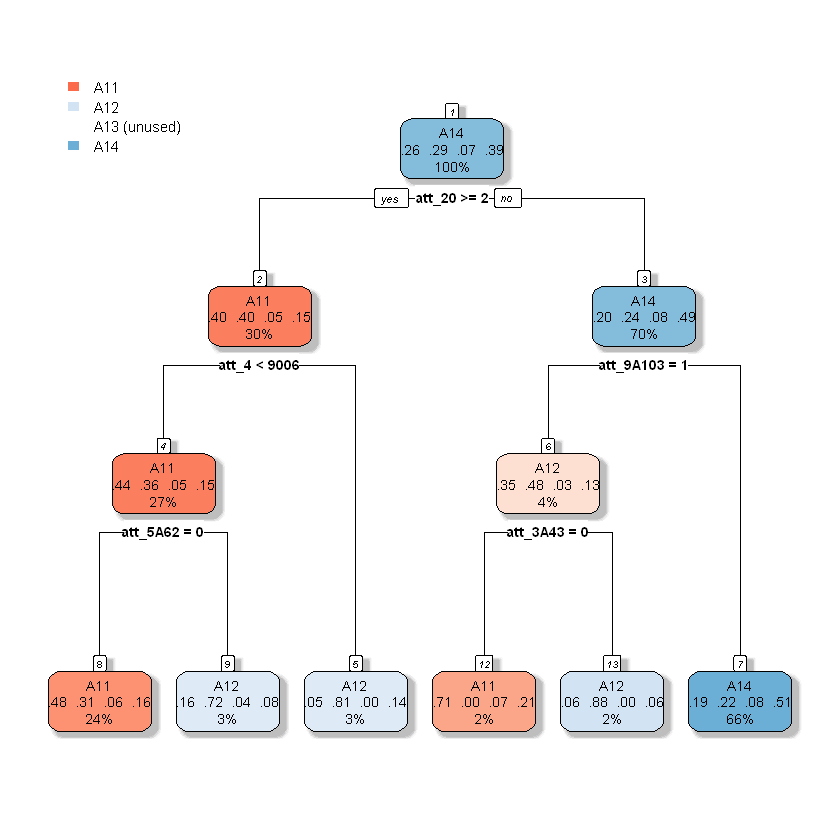

In [11]:
#Accuracy of the model when minbucket is equal to 5 is higher than the others.
rpart.plot(tree_fit_minbucket5$finalModel, box.palette="RdBu", shadow.col="gray", nn=TRUE)


In [50]:
#A13 is unused according to results, which is an indication of low occurancy.

In [32]:
#Accuracy of the model when minbucket is equal to 5 is higher than the others.
#For this reason this model is used to predict.
predict_tree = predict(tree_fit_minbucket5, test_set3 )
cm1 = confusionMatrix(predict_tree, test_set3$class)
cm1

Confusion Matrix and Statistics

          Reference
Prediction A11 A12 A13 A14
       A11  41  12   3  13
       A12   7   9   0   3
       A13   0   0   0   0
       A14  30  34   9  90

Overall Statistics
                                         
               Accuracy : 0.5578         
                 95% CI : (0.494, 0.6202)
    No Information Rate : 0.4223         
    P-Value [Acc > NIR] : 1.075e-05      
                                         
                  Kappa : 0.291          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A11 Class: A12 Class: A13 Class: A14
Sensitivity              0.5256    0.16364    0.00000     0.8491
Specificity              0.8382    0.94898    1.00000     0.4966
Pos Pred Value           0.5942    0.47368        NaN     0.5521
Neg Pred Value           0.7967    0.80172    0.95219     0.8182
Prevalence               0.3108    0.21912    0.04781     0.4223
D

In [42]:
overall_1 <- cm1$overall
overall.accuracy_1 <- overall_1['Accuracy'] 
comp_tree = c()
comp_tree[1] = as.numeric(model_tree_accuracy)
comp_tree[2]= as.numeric(overall.accuracy_1)
overall.kappa_1 = overall_1['Kappa']
overall.pvalue_1 = overall_1['AccuracyPValue']
comp_tree[3] = as.numeric(overall.kappa_1)
comp_tree[4] = as.numeric(overall.pvalue_1)

In [14]:
# Model 3: Random Forest
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#the minimal number of observations per tree leaf is determined with different values.
#Normally, it is set to 5
grid_random_forest <- expand.grid(mtry = c(1,5,9,11,15)) 

rf_fit = train(class~ ., data=train_set3,
                 method = "rf", 
                 ntree=500,
                 nodesize=5,
                 trControl = Control,
                 tuneGrid = grid_random_forest)

Random Forest 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 677, 675, 675, 675, 674, 674, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.3933363  0.0144007
   5    0.5401113  0.3081724
   9    0.5281098  0.2919901
  11    0.5281795  0.2928325
  15    0.5375693  0.3086983

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.

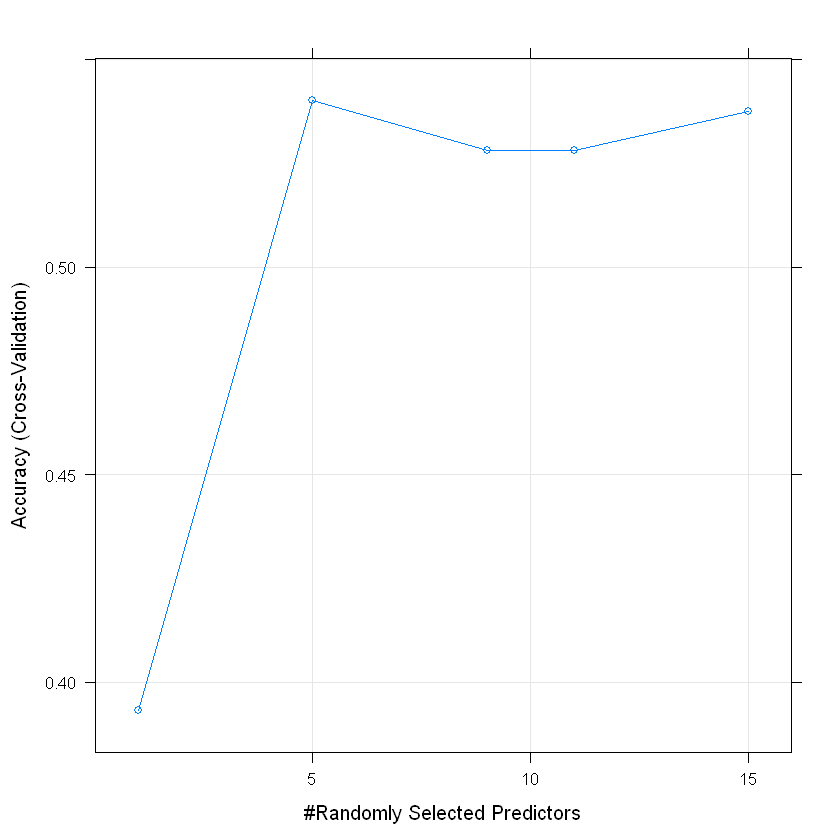

In [15]:
rf_fit
plot(rf_fit)

In [51]:
#Accuracy increases as the number of randomly selected predictors increase

In [43]:
#Accuracy of random forest at mtry=5
model_forest_accuracy = 0.5401113

In [44]:
#Prediction by using random forests method
predict_forest = predict(rf_fit, test_set3 )
cm_2 = confusionMatrix(predict_forest, test_set3$class)
overall_2 <- cm_2$overall
overall.accuracy_2 <- overall_2['Accuracy'] 
comp_forest = c()
comp_forest[1] = as.numeric(model_forest_accuracy)
comp_forest[2]= as.numeric(overall.accuracy_2)
overall.kappa_2 = overall_2['Kappa']
overall.pvalue_2 = overall_2['AccuracyPValue']
comp_forest[3] = as.numeric(overall.kappa_2)
comp_forest[4] = as.numeric(overall.pvalue_2)

In [18]:
# Model 4: Stochastic Gradient Boosting
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#Number of trees are set to 200, 400 and 600
#Interaction depth is set to 1, 3, and 5
#Learning rate is et to 0.001,0.01,0.1
#minobsinnode is set to 10 to avoid underfitting
grid_sgb <- expand.grid(n.trees = c(200,400,600), interaction.depth =c(1,3,5),shrinkage = c(0.001,0.01,0.1),n.minobsinnode = 10) 

sgb_fit = train(class~ ., data=train_set3,
                method = 'gbm',
                 trControl = Control,
                 tuneGrid = grid_sgb)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3863             nan     0.0010    0.0007
     2        1.3858             nan     0.0010    0.0007
     3        1.3853             nan     0.0010    0.0007
     4        1.3848             nan     0.0010    0.0006
     5        1.3843             nan     0.0010    0.0006
     6        1.3839             nan     0.0010    0.0007
     7        1.3834             nan     0.0010    0.0007
     8        1.3829             nan     0.0010    0.0007
     9        1.3824             nan     0.0010    0.0007
    10        1.3820             nan     0.0010    0.0007
    20        1.3774             nan     0.0010    0.0007
    40        1.3686             nan     0.0010    0.0006
    60        1.3602             nan     0.0010    0.0005
    80        1.3523             nan     0.0010    0.0005
   100        1.3447             nan     0.0010    0.0005
   120        1.3374             nan     0.0010    0.0004
   140        

In [19]:
sgb_fit

Stochastic Gradient Boosting 

750 samples
 20 predictor
  4 classes: 'A11', 'A12', 'A13', 'A14' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 677, 675, 675, 675, 674, 674, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa    
  0.001      1                  200      0.4749320  0.1924869
  0.001      1                  400      0.4828428  0.2036424
  0.001      1                  600      0.4802127  0.1995189
  0.001      3                  200      0.4934574  0.2237068
  0.001      3                  400      0.4961430  0.2286624
  0.001      3                  600      0.4961795  0.2293594
  0.001      5                  200      0.4988462  0.2353733
  0.001      5                  400      0.5013872  0.2392084
  0.001      5                  600      0.4987561  0.2362413
  0.010      1                  200      0.4814944  0.2026436
  0.010      1                  400      0.4908818  0.22

In [45]:
#Accuracy of sgb at n.trees = 200, interaction.depth = 5, shrinkage = 0.1 and n.minobsinnode = 10.
model_forest_accuracy = 0.5176195

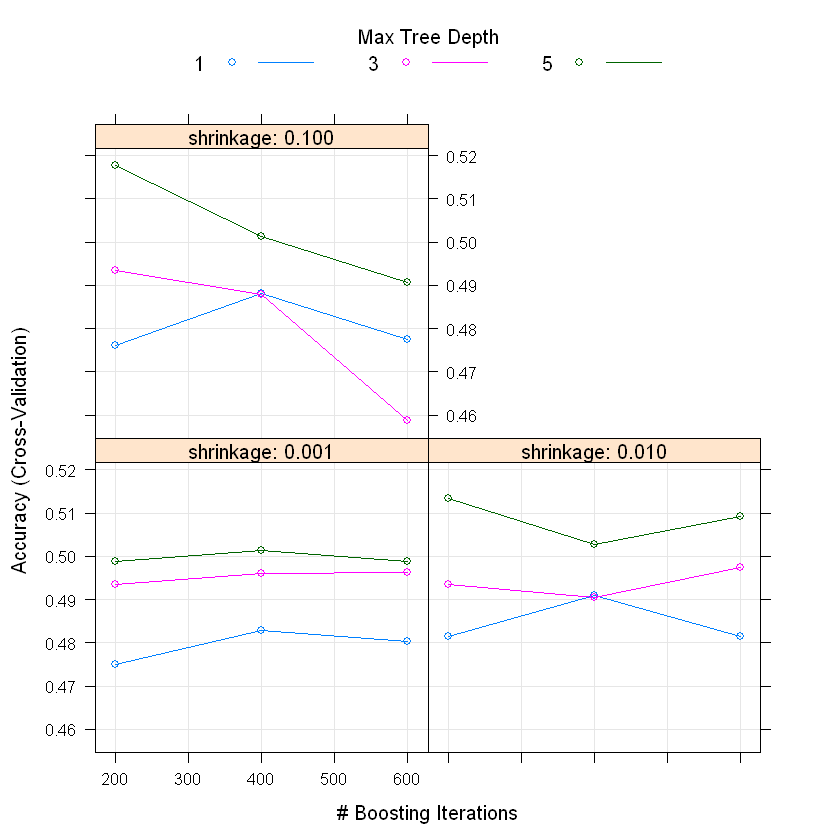

In [46]:
plot(sgb_fit)

In [47]:
#Prediction by using Stochastic Gradient Boosting
predict_sgb = predict(sgb_fit, test_set3 )
confusionMatrix(predict_sgb, test_set3$class)
cm_3 = confusionMatrix(predict_sgb, test_set3$class)
overall_3 <- cm_3$overall
overall.accuracy_3 <- overall_3['Accuracy'] 
comp_sgb = c()
comp_sgb[1]=as.numeric(model_forest_accuracy)
comp_sgb[2]= as.numeric(overall.accuracy_3)
overall.kappa_3 = overall_3['Kappa']
overall.pvalue_3 = overall_3['AccuracyPValue']
comp_sgb[3] = as.numeric(overall.kappa_3)
comp_sgb[4] = as.numeric(overall.pvalue_3)

Confusion Matrix and Statistics

          Reference
Prediction A11 A12 A13 A14
       A11  34  13   5  16
       A12  20  18   3  22
       A13   2   0   0   1
       A14  22  24   4  67

Overall Statistics
                                         
               Accuracy : 0.4741         
                 95% CI : (0.411, 0.5379)
    No Information Rate : 0.4223         
    P-Value [Acc > NIR] : 0.05556        
                                         
                  Kappa : 0.2073         
                                         
 Mcnemar's Test P-Value : 0.19705        

Statistics by Class:

                     Class: A11 Class: A12 Class: A13 Class: A14
Sensitivity              0.4359    0.32727    0.00000     0.6321
Specificity              0.8035    0.77041    0.98745     0.6552
Pos Pred Value           0.5000    0.28571    0.00000     0.5726
Neg Pred Value           0.7596    0.80319    0.95161     0.7090
Prevalence               0.3108    0.21912    0.04781     0.4223
D

In [48]:
#Model Comparison
model = c()
model[1] = "Penalized Regression Approaches (PRA)"
model[2] = "Decision Trees (DT)"
model[3] = "Random Forests (RF)"
model[4] = "Stochastic Gradient Boosting (SGB)"
data=matrix(0,4,5)
data[,1] = t(model)
data[1,2:5] = signif(comp_lasso,digits = 4)
data[2,2:5] = signif(comp_tree, digits =4)
data[3,2:5] = signif(comp_forest, digits =4)
data[4,2:5] = signif(comp_sgb, digits=4)
colnames(data) = c('Model','Accuracy of Model', 'Accuracy Calculated from Confusion Matrix', 'Kappa Calculated from Confusion Matrix',  'P-value Calculated from Confusion Matrix')

In [49]:
data

Model,Accuracy of Model,Accuracy Calculated from Confusion Matrix,Kappa Calculated from Confusion Matrix,P-value Calculated from Confusion Matrix
Penalized Regression Approaches (PRA),0.4822,0.5418,0.308,9.089e-05
Decision Trees (DT),0.5131,0.5578,0.291,1.075e-05
Random Forests (RF),0.5401,0.5219,0.2526,0.0009316
Stochastic Gradient Boosting (SGB),0.5176,0.4741,0.2073,0.05556


### When four model is compared with each other, random forest approach has highest accuracy in modelling. However, penalized regression approach and decision tree have higher accuracy values when the predicted data compared with the test data. For all cases, it can be said that accuracy of model is low, which is an indication of underfitting. For this reason, accuracy calculated by confusion matrix is also low for each approach. When we look at the kappa values calculated by confusion matrix, it is seen that they are very low. As a conclusion, neither of models are good enough to represent the training data becuse of the accuracy values. Random forest has highest value in accuracy of model. Decision tree approach has the highest accuracy when comparing the predicted values with test data, also it has highest kappa value. For this reason, decision tree can be called as best method for this dataset.